# Task 0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
import warnings

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving naive_bayes.csv to naive_bayes.csv


In [ ]:
data = pd.read_csv('naive_bayes.csv')
data

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes
5,Sunny,Cool,Normal,t,no
6,Overcast,Cool,Normal,t,yes
7,Rainy,Mild,High,f,no
8,Rainy,Cool,Normal,f,yes
9,Sunny,Mild,Normal,f,yes


In [ ]:
X = data
target = data.Play
X_train, X_test = train_test_split(X, train_size = 0.9, random_state = 13)

X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
X_train


,Outlook,Temp,Humidity,Windy,Play
0,Sunny,Cool,Normal,t,no
1,Sunny,Mild,High,f,yes
2,Rainy,Cool,Normal,f,yes
3,Rainy,Mild,High,f,no
4,Rainy,Hot,High,t,no
5,Sunny,Cool,Normal,f,yes
6,Sunny,Mild,High,t,no
7,Overcast,Cool,Normal,t,yes
8,Overcast,Hot,Normal,f,yes
9,Rainy,Mild,Normal,t,yes


# Task 1

In [ ]:
def prob(X, col_name, target_var):

  probability = X[col_name].value_counts(normalize = True)[target_var]

  return probability

prob_prior_yes = prob(X_train, 'Play', 'yes')

prob_prior_no = prob(X_train, 'Play', 'no')

print("prior probability for playing : ",prob_prior_yes)
print("prior probability for not playing : ",prob_prior_no)


prior probability for playing :  0.5833333333333334
prior probability for not playing :  0.4166666666666667


# Task 2

In [ ]:
def l_prob_yes(X, col_name, col_var):
  prob = (X[(X[col_name] == col_var) & (X['Play'] == 'yes')].shape[0])/(X['Play'] == 'yes').sum()
  return prob

features_values = {
    'Outlook': ['Sunny', 'Rainy', 'Overcast'],
    'Temp': ['Cool', 'Hot', 'Mild'],
    'Humidity': ['High', 'Normal'],
    'Windy': ['t', 'f']
}

# Initialize a dictionary to store the likelihood probabilities
likelihood_probs = {}

# Loop through each feature and its values
for feature, values in features_values.items():
    for value in values:
        # Calculate the likelihood probability for the current feature-value pair
        prob = l_prob_yes(X_train, feature, value)

        # Store the likelihood probability in the dictionary
        likelihood_probs[(feature, value)] = prob

# Print the likelihood probabilities
for feature_value, prob in likelihood_probs.items():
    print(f"Probability of {feature_value[0]} = {feature_value[1]} given Play = yes: {prob}")




Probability of Outlook = Sunny given Play = yes: 0.2857142857142857
Probability of Outlook = Rainy given Play = yes: 0.2857142857142857
Probability of Outlook = Overcast given Play = yes: 0.42857142857142855
Probability of Temp = Cool given Play = yes: 0.42857142857142855
Probability of Temp = Hot given Play = yes: 0.2857142857142857
Probability of Temp = Mild given Play = yes: 0.2857142857142857
Probability of Humidity = High given Play = yes: 0.2857142857142857
Probability of Humidity = Normal given Play = yes: 0.7142857142857143
Probability of Windy = t given Play = yes: 0.2857142857142857
Probability of Windy = f given Play = yes: 0.7142857142857143


In [ ]:
def l_prob_no(X, col_name, col_var):
  prob = (X[(X[col_name] == col_var) & (X['Play'] == 'no')].shape[0])/(X['Play'] == 'no').sum()
  return prob


features_values = {
    'Outlook': ['Sunny', 'Rainy', 'Overcast'],
    'Temp': ['Cool', 'Hot', 'Mild'],
    'Humidity': ['High', 'Normal'],
    'Windy': ['t', 'f']
  }

# Initialize a dictionary to store the likelihood probabilities
likelihood_probs = {}

# Loop through each feature and its values
for feature, values in features_values.items():
    for value in values:
        # Calculate the likelihood probability for the current feature-value pair
        prob = l_prob_no(X_train, feature, value)

        # Store the likelihood probability in the dictionary
        likelihood_probs[(feature, value)] = prob

# Print the likelihood probabilities
for feature_value, prob in likelihood_probs.items():
    print(f"Probability of {feature_value[0]} = {feature_value[1]} given Play = no: {prob}")

Probability of Outlook = Sunny given Play = no: 0.4
Probability of Outlook = Rainy given Play = no: 0.6
Probability of Outlook = Overcast given Play = no: 0.0
Probability of Temp = Cool given Play = no: 0.2
Probability of Temp = Hot given Play = no: 0.4
Probability of Temp = Mild given Play = no: 0.4
Probability of Humidity = High given Play = no: 0.8
Probability of Humidity = Normal given Play = no: 0.2
Probability of Windy = t given Play = no: 0.6
Probability of Windy = f given Play = no: 0.4


# Task 3


In [ ]:
X_test

,Outlook,Temp,Humidity,Windy,Play
0,Sunny,Mild,Normal,f,yes
1,Overcast,Mild,High,t,yes


In [ ]:
y = X_test['Play']
X_test.drop(columns=['Play'], inplace=True)

print(y)
print(X_test)

0    yes
1    yes
Name: Play, dtype: object
    Outlook  Temp Humidity Windy
0     Sunny  Mild   Normal     f
1  Overcast  Mild     High     t


In [ ]:
def post_prob(X, X_train, prob_prior_yes, prob_prior_no):

  post_yes = (prob_prior_yes)
  post_yes_values = []


  for index, row in X.iterrows():
    post_yes = 1
    for column_name,cell in row.iteritems():
      post_yes = (post_yes)*(l_prob_yes(X_train, column_name, cell))

    post_yes_values.append(post_yes)


  post_no = (prob_prior_no)
  post_no_values = []

  for index, row in X.iterrows():
    post_no = 1
    for column_name,cell in row.iteritems():
      post_no = (post_no)*(l_prob_no(X_train, column_name, cell))

    post_no_values.append(post_no)

  return post_yes_values, post_no_values






In [ ]:
post_yes_val, post_no_val = post_prob(X_test, X_train, prob_prior_yes, prob_prior_no)
print(post_yes_val)
print(post_no_val)

print('Values on the same indices of these arrays represent posterior probabilities of yes and no for a test sample.')

[0.04164931278633902, 0.009995835068721363]
[0.012800000000000004, 0.0]
Values on the same indices of these arrays represent posterior probabilities of yes and no for a test sample.


<ipython-input-10-e1a8ad17ec7a>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name,cell in row.iteritems():
<ipython-input-10-e1a8ad17ec7a>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name,cell in row.iteritems():


In [ ]:
def predictions(X_test, post_yes_val, post_no_val):

  for i in range(len(X_test)):
    if post_yes_val[i] > post_no_val[i]:
      print('yes, she would play');

    else:
      print("no, she won't play");


# Task 4


In [ ]:
p = predictions(X_test, post_yes_val, post_no_val)

yes, she would play
yes, she would play


# Task 5 (Laplace Smoothing)

In [ ]:
def laplace_prob_yes(X, col_name, col_var):
  k = X.shape[1]-1

  prob = ((X[(X[col_name] == col_var) & (X['Play'] == 'yes')].shape[0])+1)/(((X['Play'] == 'yes').sum())+k)
  return prob



features_values = {
    'Outlook': ['Sunny', 'Rainy', 'Overcast'],
    'Temp': ['Cool', 'Hot', 'Mild'],
    'Humidity': ['High', 'Normal'],
    'Windy': ['t', 'f']
}

# Initialize a dictionary to store the likelihood probabilities
laplace_probs = {}

# Loop through each feature and its values
for feature, values in features_values.items():
    for value in values:
        # Calculate the likelihood probability for the current feature-value pair
        prob = laplace_prob_yes(X_train, feature, value)

        # Store the likelihood probability in the dictionary
        laplace_probs[(feature, value)] = prob

# Print the likelihood probabilities
for feature_value, prob in laplace_probs.items():
    print(f"Laplace probability of {feature_value[0]} = {feature_value[1]} given Play = yes: {prob}")

Laplace probability of Outlook = Sunny given Play = yes: 0.2727272727272727
Laplace probability of Outlook = Rainy given Play = yes: 0.2727272727272727
Laplace probability of Outlook = Overcast given Play = yes: 0.36363636363636365
Laplace probability of Temp = Cool given Play = yes: 0.36363636363636365
Laplace probability of Temp = Hot given Play = yes: 0.2727272727272727
Laplace probability of Temp = Mild given Play = yes: 0.2727272727272727
Laplace probability of Humidity = High given Play = yes: 0.2727272727272727
Laplace probability of Humidity = Normal given Play = yes: 0.5454545454545454
Laplace probability of Windy = t given Play = yes: 0.2727272727272727
Laplace probability of Windy = f given Play = yes: 0.5454545454545454


In [ ]:
def laplace_prob_no(X, col_name, col_var):
  k = X.shape[1]-1
  prob = ((X[(X[col_name] == col_var) & (X['Play'] == 'no')].shape[0])+1)/(((X['Play'] == 'no').sum())+k)

  return prob


features_values = {
    'Outlook': ['Sunny', 'Rainy', 'Overcast'],
    'Temp': ['Cool', 'Hot', 'Mild'],
    'Humidity': ['High', 'Normal'],
    'Windy': ['t', 'f']
  }

# Initialize a dictionary to store the likelihood probabilities
laplace_probs = {}

# Loop through each feature and its values
for feature, values in features_values.items():
    for value in values:
        # Calculate the likelihood probability for the current feature-value pair
        prob = laplace_prob_no(X_train, feature, value)

        # Store the likelihood probability in the dictionary
        laplace_probs[(feature, value)] = prob

# Print the likelihood probabilities
for feature_value, prob in laplace_probs.items():
    print(f"Laplace probability of {feature_value[0]} = {feature_value[1]} given Play = no: {prob}")

Laplace probability of Outlook = Sunny given Play = no: 0.3333333333333333
Laplace probability of Outlook = Rainy given Play = no: 0.4444444444444444
Laplace probability of Outlook = Overcast given Play = no: 0.1111111111111111
Laplace probability of Temp = Cool given Play = no: 0.2222222222222222
Laplace probability of Temp = Hot given Play = no: 0.3333333333333333
Laplace probability of Temp = Mild given Play = no: 0.3333333333333333
Laplace probability of Humidity = High given Play = no: 0.5555555555555556
Laplace probability of Humidity = Normal given Play = no: 0.2222222222222222
Laplace probability of Windy = t given Play = no: 0.4444444444444444
Laplace probability of Windy = f given Play = no: 0.3333333333333333


In [ ]:
def l_post_prob(X, X_train, prob_prior_yes, prob_prior_no):

  post_yes = (prob_prior_yes)
  post_yes_values = []


  for index, row in X.iterrows():
    post_yes = 1
    for column_name,cell in row.iteritems():
      post_yes = (post_yes)*(laplace_prob_yes(X_train, column_name, cell))

    post_yes_values.append(post_yes)


  post_no = (prob_prior_no)
  post_no_values = []

  for index, row in X.iterrows():
    post_no = 1
    for column_name,cell in row.iteritems():
      post_no = (post_no)*(laplace_prob_no(X_train, column_name, cell))

    post_no_values.append(post_no)

  return post_yes_values, post_no_values


In [ ]:
post_yes_val, post_no_val = l_post_prob(X_test, X_train, prob_prior_yes, prob_prior_no)
print(post_yes_val)
print(post_no_val)

print('Values on the same indices of these arrays represent posterior probabilities of yes and no for a test sample.')

[0.022129635953828282, 0.0073765453179427615]
[0.008230452674897118, 0.009144947416552354]
Values on the same indices of these arrays represent posterior probabilities of yes and no for a test sample.


<ipython-input-16-85af5300418e>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name,cell in row.iteritems():
<ipython-input-16-85af5300418e>:20: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name,cell in row.iteritems():


In [ ]:
def l_predictions(X_test, post_yes_val, post_no_val):

  for i in range(len(X_test)):
    if post_yes_val[i] > post_no_val[i]:
      print('yes, she would play');

    else:
      print("no, she won't play");


In [ ]:
p = l_predictions(X_test, post_yes_val, post_no_val)

yes, she would play
no, she won't play


# LDA

In [8]:

import csv
import numpy as np
import matplotlib.pyplot as plt


def ComputeMeanDiff(X):

  target_col = X[:, 2]
  cond = target_col > 0
  arr1 = X[cond]
  arr0 = X[~cond]

  m1 = np.mean(arr0[:, :-1], axis=0)
  m2 = np.mean(arr1[:, :-1], axis=0)

  m = abs(m1 - m2)

  return m

def ComputeSW(X):
  class_labels = np.unique(X[:, -1])
  SW = np.zeros((X.shape[1] - 1, X.shape[1] - 1))

  for c in class_labels:
      X_c = X[X[:, -1] == c][:, :-1]
      mean_c = np.mean(X_c, axis=0)
      SW += np.dot((X_c - mean_c).T, (X_c - mean_c))
  return SW

def ComputeSB(X):

  overall_mean = np.mean(X[:, :-1], axis=0)
  class_labels = np.unique(X[:, -1])
  SB = np.zeros((X.shape[1] - 1, X.shape[1] - 1))

  for c in class_labels:
      X_c = X[X[:, -1] == c][:, :-1]
      mean_c = np.mean(X_c, axis=0)
      n_c = X_c.shape[0]
      mean_diff = mean_c - overall_mean
      SB += n_c * np.outer(mean_diff, mean_diff)
  return SB

def GetLDAProjectionVector(X):

  SW = ComputeSW(X)
  SB = ComputeSB(X)
  A = np.linalg.inv(SW).dot(SB)
  eigenvalues, eigenvectors = np.linalg.eig(A)
  idx = np.argmax(np.abs(eigenvalues))
  w = eigenvectors[:, idx].real
  return w

def project(x,y,w):
   point = np.array([x, y])
   return np.dot(point, w)

#########################################################
###################Helper Code###########################
#########################################################

X = np.empty((0, 3))
with open('data.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for sample in csvFile:
        X = np.vstack((X, np.array(sample, dtype = float)))

print(X)
print(X.shape)


[[ 1.86189843  2.72296272  0.        ]
 [ 2.23589604 -2.15772062  0.        ]
 [ 1.69281688  0.99589606  0.        ]
 ...
 [ 4.46678886  3.44492577  1.        ]
 [ 5.65897988  4.04334073  1.        ]
 [ 1.98017955  7.15815205  1.        ]]
(2000, 3)


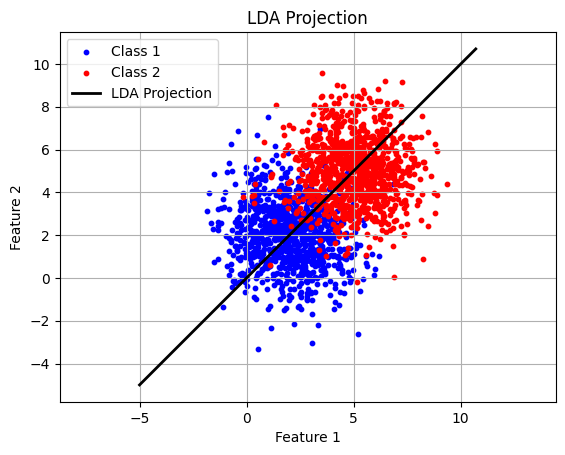

In [9]:
X = X.astype(float)

arr0 = X[X[:, 2] == 0.0][:, [0,1]]
arr1 = X[X[:, 2] == 1.0][:, [0,1]]

w = GetLDAProjectionVector(X)

projected_arr0 = np.dot(arr0, w)
projected_arr1 = np.dot(arr1, w)

# Plot the original data and the LDA projection
plt.scatter(arr0[:, 0], arr0[:, 1], color='blue', label='Class 1',s=10)
plt.scatter(arr1[:, 0], arr1[:, 1], color='red', label='Class 2',s=10)
plt.plot([-5, w[0]+10], [-5, w[1]+10], color='black', linewidth=2, label='LDA Projection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('LDA Projection')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Projecting features only, excluding class labels

def project_data(X, w):
    return np.dot(X, w)

# Function to implement 1-NN classifier
def one_nn_classifier(X_train, y_train, X_test):
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train, y_train)
    return clf.predict(X_test)

In [17]:
X_features = X[:, :-1]
y_labels = X[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=42)

# Compute LDA projection vector
w = GetLDAProjectionVector(X)

# Project training and testing data onto the LDA projection vector
X_train_projected = project_data(X_train, w)
X_test_projected = project_data(X_test, w)

X_train_projected = X_train_projected.reshape(-1, 1)  # Reshape to 2D array with a single feature
X_test_projected = X_test_projected.reshape(-1, 1)

# Train and evaluate 1-NN classifier on original and projected data
y_pred_original = one_nn_classifier(X_train, y_train, X_test)
y_pred_projected = one_nn_classifier(X_train_projected, y_train, X_test_projected)

# Calculate accuracy for original and projected data
accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_projected = accuracy_score(y_test, y_pred_projected)

print("Accuracy on original data:", accuracy_original)
print("Accuracy on projected data:", accuracy_projected)

Accuracy on original data: 0.8875
Accuracy on projected data: 0.88
